# Supervised Learning Linear Regression

Setting up data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#import from csv
nyc_sub = pd.read_csv('C:/Users/aswat/nyc_subway_weather.csv')

In [4]:
nyc_sub.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,5/1/2011,0:00:00,4388333,2911002,0.0,0.0,5/1/2011 0:00,0.0,6.0,...,30.22,0.0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,5/1/2011,4:00:00,4388333,2911002,0.0,0.0,5/1/2011 4:00,4.0,6.0,...,30.25,0.0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,5/1/2011,12:00:00,4388333,2911002,0.0,0.0,5/1/2011 12:00,12.0,6.0,...,30.28,0.0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,5/1/2011,16:00:00,4388333,2911002,0.0,0.0,5/1/2011 16:00,16.0,6.0,...,30.26,0.0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,5/1/2011,20:00:00,4388333,2911002,0.0,0.0,5/1/2011 20:00,20.0,6.0,...,30.28,0.0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [5]:
nyc_sub.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42647.000000,42647.000000,42647.000000,42647.000000,42648.000000,42648.000000,42648.000000,42648.000000,...,42648.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000
mean,2.812486e+07,1.986993e+07,1886.648862,1361.523859,10.046381,2.905691,0.714430,40.724648,-73.940366,0.009825,...,29.971095,0.224752,63.103735,6.927711,0.004618,29.971097,63.103968,6.927782,40.728558,-73.938698
std,3.043607e+07,2.028986e+07,2952.441710,2183.890279,6.938864,2.079250,0.451691,0.071650,0.059712,0.098632,...,0.137943,0.417424,8.455722,4.510216,0.016345,0.131159,6.939119,3.179879,0.065421,0.059581
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.500000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [6]:
df1 = nyc_sub.copy()
#drop rows with NA
df1.dropna(inplace = True)
df1.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

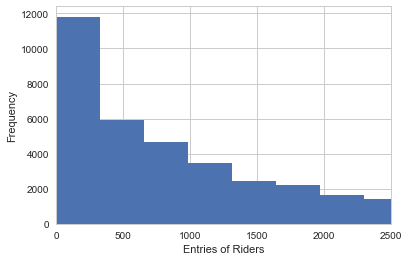

In [7]:
#Entries of Riders
plt.hist(df1['ENTRIESn_hourly'],bins=100)
plt.xlim(0,2500)
plt.xlabel('Entries of Riders')
plt.ylabel('Frequency')

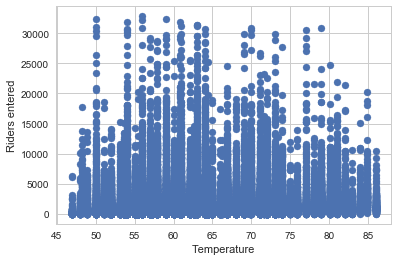

In [8]:
#Scatter plot
plt.scatter(df1['tempi'],df1['ENTRIESn_hourly'])
plt.ylabel('Riders entered')
plt.xlabel('Temperature')

We could obtain a linear fit by using a Seaborn.

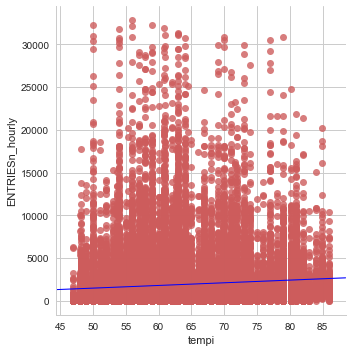

In [9]:
sns.lmplot('tempi','ENTRIESn_hourly',data=df1,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue' })

# Univariate Linear Regression

This nothing but a regression with a single variable. We will be using NUMPY to demonstrate this:
Numpy expects a 2D array, first is different example values, and the second is attribute number

In [10]:
X = df1['tempi']
X.shape

(42647,)

In [11]:
X = np.vstack(df1['tempi'])
X.shape

(42647, 1)

In [12]:
Y = df1['ENTRIESn_hourly']

Now we have our X and Y, next we need to go ahead and use numpy to create the single variable linear regression.

                        y = mx + b
Using matrix,                        
                        
                        y =  Ap
                        A = [x 1]
                        p =[m
                            b]

In [13]:
#Create a matrix [X 1]
X = np.array( [ [value,1] for value in X] )
X

array([[array([ 55.9]), 1],
       [array([ 52.]), 1],
       [array([ 62.1]), 1],
       ..., 
       [array([ 81.]), 1],
       [array([ 77.]), 1],
       [array([ 69.1]), 1]], dtype=object)

In [14]:
# Best fit values (method linear algebra and least square method)
m , b = np.linalg.lstsq(X,Y)[0]

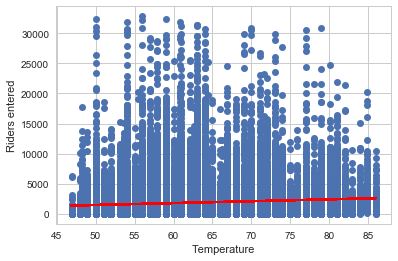

In [15]:
plt.plot(df1['tempi'],df1['ENTRIESn_hourly'],'o')

x= df1['tempi']

plt.plot(x, m*x + b,'r', label='Best fit line')
plt.ylabel('Riders entered')
plt.xlabel('Temperature')

# Finding Error in our fitted line

       We did single variable regression using the least squares method. We need to find the error. It easier to understand root mean squared error, which is similar to Standard deviation. To find out root mean square we need to divide by number of elements and then take the square root.

In [16]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print('The root mean square error is %.2f' %rmse)

The root mean square error is 2940.53


Since rmse corresponds to Standard deviation, we could infer that number of rider wont be twice the rmse, 95% of time

# Multivariate Regression using Scikit learn

In [17]:
#import linear regression
import sklearn
from sklearn.linear_model import LinearRegression


The Linear regression class is an estimator.It predicts a value based on the observed data. All the estimators implement fit() and predict() methods. The fit method is used to learn the parameters of a model, and the predict method is used predict the value of a response variable using the learned parameters.

In [18]:
# create an object
lreg = LinearRegression()

# Linear Regression Methods: 

lreg.fit() : fits a linear model

lreg.predict() : predicts Y using the linear model with estimated coefficients

lreg.score() returns the coefficient of determination (R^2). A measure of how well the observed outcomes are replicated by the model.

In [19]:
X_multi = df1[['hour','day_week','fog','precipi','pressurei','rain','tempi','wspdi']]

Y_Target = df1.ENTRIESn_hourly



In [20]:
lreg.fit(X_multi,Y_Target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print('The estimated intercept coefficient is %.2f' %lreg.intercept_)
print('The number of coefficient used is %.2f' %len(lreg.coef_))

The estimated intercept coefficient is 11731.27
The number of coefficient used is 8.00


  The equation now is changed as,
       
                            y(w,x) = w0 + w1x1 + ... + wpxp
                            
                            where w is the coefficient and w0 is the intercept

In [22]:
#df
coeff_df = DataFrame(X_multi.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimates'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimates
0,hour,126.320488
1,day_week,-150.447916
2,fog,-690.828919
3,precipi,-253.720611
4,pressurei,-356.745100
5,rain,178.622292
6,tempi,3.214556
7,wspdi,-31.688185


We initially approached the problem with hour as the best correlated variable for the target arrival. But this table let us know that the rain is the best coefficient estimate when compared to that of others.

# Using Training and Validation

We need to check on how the Entries_hour is dependent on the other variables

In [23]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,df1['ENTRIESn_hourly'])

In [25]:
# size of the training
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(31985, 2) (10662, 2) (31985,) (10662,)


In [27]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#prediction
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [29]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : %.2f"
     % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : 8696447.75


In [30]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: %.2f"
     % np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: 8498270.61


# Residual Plot

In regression analysis, the difference between the observed value of the dependent variable(y) and the predicted value(y^) is called as the residual(e).

                          Residual = Observed value - Predicted value

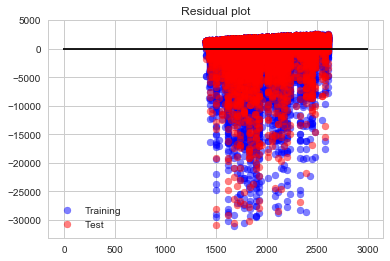

In [36]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin=-10,xmax=3000)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')